In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
import seaborn as sns

In [5]:
df = pd.read_csv('commission.csv')
df.head()

,date,session_id,experiment_id,experiment_variation_id,commission
0,2/16/2017,0405caaf-5359-4ca7-bdc8-b2f41787322a,reho1,_original_,35.23
1,2/16/2017,141ea190-c7db-4daf-8564-a2e24d2f68a5,reho1,_original_,17.63
2,2/16/2017,25d18b51-67a7-4ac0-af39-bb7157ddb408,reho1,_original_,9.16
3,2/16/2017,2c92d510-5557-4716-8277-296db729efd7,reho1,_original_,16.17
4,2/16/2017,2dfc9f5c-8898-44fa-8f9b-1693314700ea,reho1,_original_,12.43


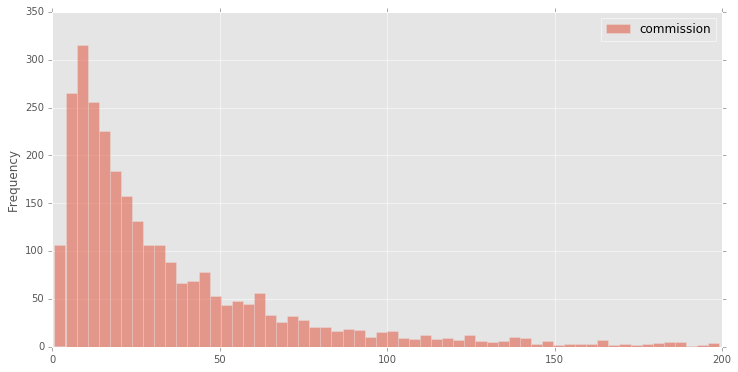

In [6]:
df[df['commission'] < 200].plot.hist(alpha=0.5,bins=60,figsize=(12,6))

In [11]:
df = pd.read_csv('data/hprf1_exp.csv')
df.head()

,date,session_id,experiment_id,experiment_variation_id,commission
0,2017-03-11,509c49e0-f49d-4aa7-b563-67405ab8fde6,hprf1,_original_,163.9029
1,2017-03-11,71b9cd19-6709-4e69-a431-f2ec710dbd19,hprf1,b,35.8175
2,2017-03-11,e3386a20-9da3-4a46-991e-018d90e4d373,hprf1,_original_,9.0121
3,2017-03-11,3b223b18-c353-4609-a3cb-41a55a3f5808,hprf1,b,150.9448
4,2017-03-11,d1d14255-fdf2-4019-a757-17015f5fa08f,hprf1,b,172.1512


In [17]:
df.groupby('experiment_variation_id')['commission'].mean()

experiment_variation_id
_original_    33.492605
b             38.334828
Name: commission, dtype: float64

In [61]:
df.groupby('experiment_variation_id')['commission'].count()

experiment_variation_id
_original_    484
b             439
Name: commission, dtype: int64

In [62]:
df.groupby('experiment_variation_id')['commission'].max()

experiment_variation_id
_original_    383.5750
b             759.6201
Name: commission, dtype: float64

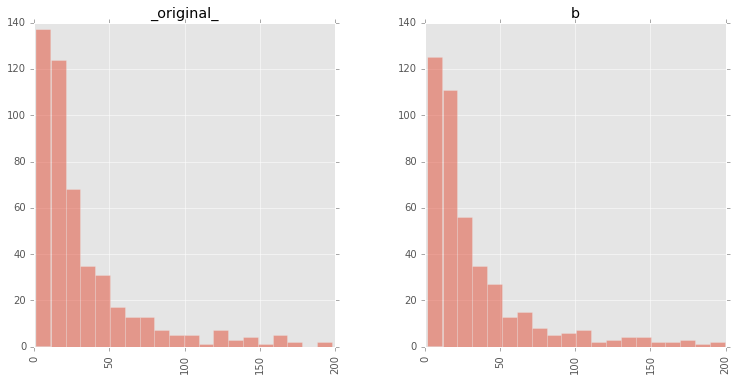

In [63]:
df[df['commission'] < 200].hist(alpha=0.5, bins=20, by=df['experiment_variation_id'], figsize=(12,6));

In [47]:
test = df['experiment_variation_id'].value_counts().to_frame().reset_index()

In [ ]:
bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

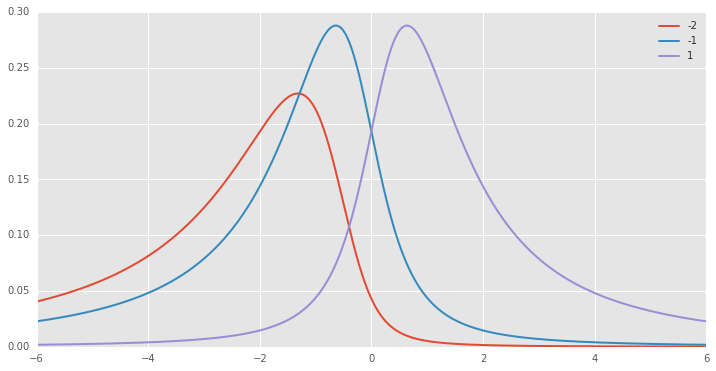

In [78]:
x_fit = np.linspace(-6, 6, 1000)
fig, ax = plt.subplots()
t_vals = [1, 2, 100]
sk_vals  = [-2, -1, 1]
for t, sk in zip(t_vals, sk_vals):
  pdf = stats.nct(1, sk, 0, 1).pdf(x_fit)
  ax.plot(x_fit, pdf, linewidth=2)
ax.legend(sk_vals)

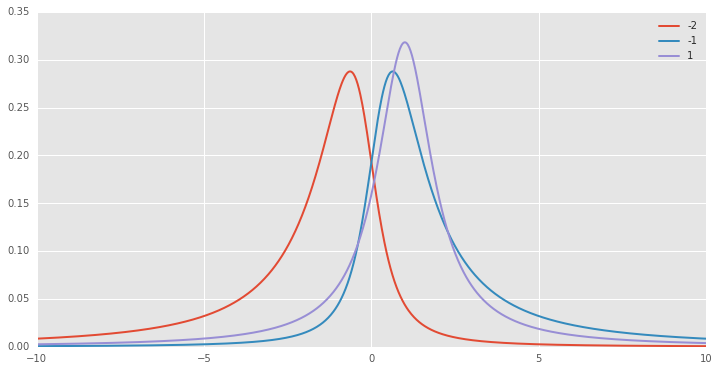

In [97]:
df, nc = 1, 0
x = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, stats.nct.pdf(x, df, -1, nc), linewidth=2)
ax.plot(x, stats.nct.pdf(x, df, 1, nc), linewidth=2)
ax.plot(x, stats.nct.pdf(x, df, nc, 1), linewidth=2)
ax.legend(sk_vals)

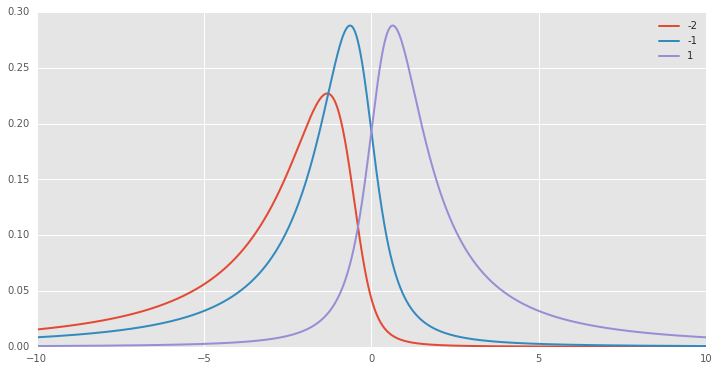

In [56]:
x_fit = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
t_vals = [1, 2, 100]
sk_vals  = [-2, -1, 1]
for t, sk in zip(t_vals, sk_vals):
  pdf = stats.nct(1, sk, 0, 1).pdf(x_fit)
  ax.plot(x_fit, pdf, linewidth=2)
ax.legend(sk_vals)

In [92]:
help(nct)

Help on nct_gen in module scipy.stats._continuous_distns object:

class nct_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A non-central Student's T continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `nct` is::
 |  
 |                                          df**(df/2) * gamma(df+1)
 |      nct.pdf(x, df, nc) = ----------------------------------------------------
 |                           2**df*exp(nc**2/2) * (df+x**2)**(df/2) * gamma(df/2)
 |  
 |  for ``df > 0``.
 |  
 |  `nct` takes ``df`` and ``nc`` as shape parameters.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      nct_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods inherited from scipy.stats._distn_infrastructure.rv_continuous:
 |  
 |  __init__(self, momtype=1, a=None, b=None, xtol=1e-14, badvalue=None,